# ECE 445 (ML for ENGG): Mini Jupyter Exercise #4

*Eric Jiang
ewj12 158002948*

10/12/2018

**Training Dataset**

In [1]:
from sklearn.datasets import load_digits
# use sklearn.svm.linearsvc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

images, labels = load_digits(2, return_X_y=True)

# Labeled training set
training_images = images[:300]
training_labels = labels[:300]

# Labeled test set
test_images = images[300:]
test_labels = labels[300:]

#for i in range (0,15):
    #print('digit:', i)
    #plt.matshow(X_hat.T[i,:].reshape(8,8))
    

**k-NN Classification Using 2-D Features**

Problem 1

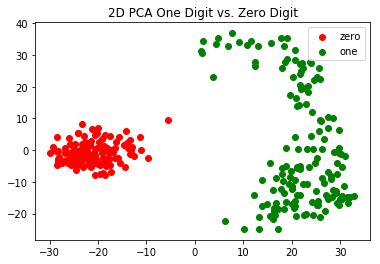

In [67]:
# Transpose the data matrix so each sample is a column
X = training_images.T

mean_vec = (np.sum(X, axis=1))/(X.shape[1])
mean_mat = np.tile(mean_vec.reshape(X.shape[0],1),[1,X.shape[1]])

#center the matrix
centered_X = X - mean_mat

#Singular Value Decomp centered matrix
U, s, Vh = np.linalg.svd(centered_X)

#Top 2 principal components of the centered data matrix
U2 = U[:,0:2]

#PCA features
X_tilde = U2.T@centered_X

#reconstruction
X_hat = U2@X_tilde + mean_mat

#Splitting the 0 and 1 2D (x,y) coordinates
x0vals = []
y0vals = []
x1vals = []
y1vals = []

for i in range (0,300):
    xn = X_tilde.T[i,0]
    yn = X_tilde.T[i,1]
    
    # if label = 0 append to x0,y0 else append to x1,y1
    if training_labels[i] == 0:
        x0vals.append(xn)
        y0vals.append(yn)
    else:
        x1vals.append(xn)
        y1vals.append(yn)
            
#Plotting
plt.scatter(x0vals,y0vals, color = 'red', label = 'zero')
plt.scatter(x1vals,y1vals, color = 'green', label = 'one')
plt.title('2D PCA One Digit vs. Zero Digit')
plt.legend()
plt.show()


Problem 2

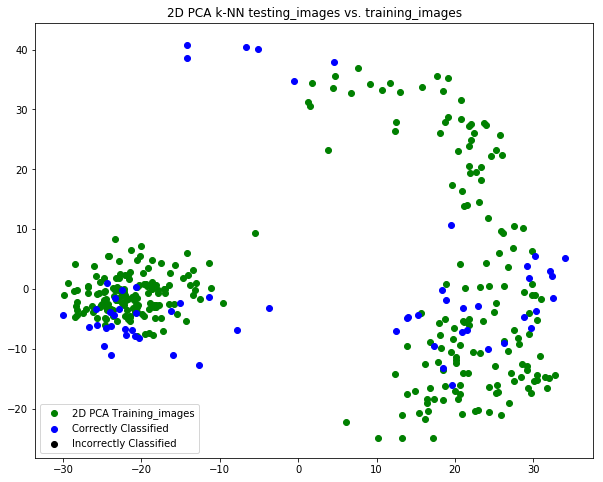

In [55]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt

##### Find the 2D PCA features of test_images set #####

# Transpose the data matrix so each sample is a column
X = test_images.T

mean_vec = (np.sum(X, axis=1))/(X.shape[1])
mean_mat = np.tile(mean_vec.reshape(X.shape[0],1),[1,X.shape[1]])

#center the matrix
centered_X = X - mean_mat

#Singular Value Decomp centered matrix
U, s, Vh = np.linalg.svd(centered_X)

#Top 2 principal components of the centered data matrix
U2 = U[:,0:2]

#X_tilde1 = 2D PCA features of test_set
X_tilde1 = U2.T@centered_X

#Create class imagelabel(image = norm, label = 0,1)
#Use for knn to sort images based on norm while keeping its label
class imagelabel:
    def __init__(self, image, label):
        self.image = image
        self.label = label
    def __repr__(self):
        return repr((self.image, self.label))

#Create k-NN function to calculate the norms to the desired 'point'
#Using closest 'k' # of points to classify labels
def knn(point,k):
    #Create a matrix to store all the norm distances w/ labels
    norm_mat = []
    
    #Use the 300 pt training_images set
    for i in range (0,300):
        #Use X_tilde the 2D PCA features of training_images
        #Find norm between point and training set
        norm = np.linalg.norm(point-X_tilde.T[i])
        
        #append each (norm, label) using class imagelabel(norm,label)
        if training_labels[i] == 0: 
            norm_mat.append(imagelabel(norm,0))
        else:
            norm_mat.append(imagelabel(norm,1))
    
    #sort based on image's closest norms
    nmsort = sorted(norm_mat, key=lambda pt: pt.image)
    
    #Create counters to determine labels for k closest pts.
    counter0 = 0
    counter1 = 0
    
    #loop through k closest points
    for i in range (0,k):
        nms = nmsort[i]
        if nms.label == 0: #if label = 0 counter0++
            counter0+=1
        else:
            counter1+=1 #else label = 1 counter1++
    
    #output 0,1 label corresponding to highest counter
    if counter0 >= counter1:
        output = 0
    else:
        output = 1
    
    #return norm matrix, sorted norm matrix, 0-1 output
    return norm_mat, nmsort, output

#create right/wrong 2D pts for plotting
xtright = []
ytright = []
xtwrong = []
ytwrong = []

#loop through the 60 pt test_images set to compare k-NN output to label
for i in range (0, 60):
    nm, nm2, o = knn(X_tilde1.T[i],5)
    xn = X_tilde1.T[i,0]
    yn = X_tilde1.T[i,1]
    
    #if output = test_label then k-NN classified right
    #else classified wrong
    if o == test_labels[i]:
        xtright.append(xn) #append right pts for plot
        ytright.append(yn)
        #print('index',i, o, 'right')
    else:
        xtwrong.append(xn) #append wrong pts for plot
        ytwrong.append(yn)
        #print('index:',i, o, 'wrong')

plt.figure(figsize=(10,8))
plt.scatter(X_tilde.T[:,0],X_tilde.T[:,1], color = 'green', label = '2D PCA Training_images')
plt.scatter(xtright,ytright, color = 'blue', label = 'Correctly Classified')
plt.scatter(xtwrong,ytwrong, color = 'black', label = 'Incorrectly Classified')
plt.title('2D PCA k-NN testing_images vs. training_images')
plt.legend()
plt.show()

It is shown in my k-NN algorithm with k = 5 that every point is classified correctly. 

I compared the 60 pt test set to 300 pt training set. 

Looking at the graph, when only 5 closest points (from the training set) are chosen it makes sense that all the new test points are classified correctly.

**Problem 3**



In [60]:
#loop through the 60 pt test_images set to compare k-NN output to label
rightcounter = 0
wrongcounter = 0

#Loop through N -> 60 and k -> 300
for n in range (0, 60):
    for k in range (0,299):
        nm, nm2, o = knn(X_tilde1.T[n],k)
        if o == test_labels[n]:
            rightcounter +=1
        else:
            wrongcounter +=1

print("# pts classified correctly:",rightcounter)
print("# pts classified incorrectly:",wrongcounter)

# pts classified correctly: 16589
# pts classified incorrectly: 1351


In [62]:
error = wrongcounter/(rightcounter+wrongcounter)
print("Average Classification Error:", error)

Average Classification Error: 0.07530657748049052


To find k-NN's average classification error, a nested for loop was used to determine correct/incorrect labels. The double loop went through all the N values (60 from test_set) and the K values (300 from training_set).

This is because with lower K values (such as k=5), the test_data showed no error being compared to 300 training_pts. However, the error began increasing with higher K values.


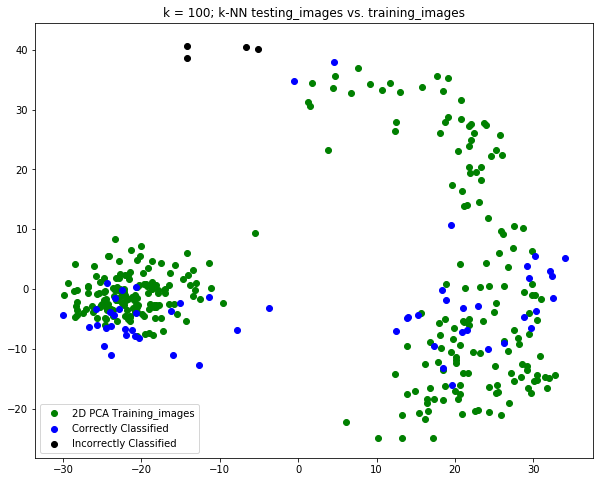

In [66]:
#create right/wrong 2D pts for plotting
xtright = []
ytright = []
xtwrong = []
ytwrong = []

#loop through the 60 pt test_images set to compare k-NN output to label
for i in range (0, 60):
    nm, nm2, o = knn(X_tilde1.T[i],100)
    xn = X_tilde1.T[i,0]
    yn = X_tilde1.T[i,1]
    
    #if output = test_label then k-NN classified right
    #else classified wrong
    if o == test_labels[i]:
        xtright.append(xn) #append right pts for plot
        ytright.append(yn)
        #print('index',i, o, 'right')
    else:
        xtwrong.append(xn) #append wrong pts for plot
        ytwrong.append(yn)
        #print('index:',i, o, 'wrong')

plt.figure(figsize=(10,8))
plt.scatter(X_tilde.T[:,0],X_tilde.T[:,1], color = 'green', label = '2D PCA Training_images')
plt.scatter(xtright,ytright, color = 'blue', label = 'Correctly Classified')
plt.scatter(xtwrong,ytwrong, color = 'black', label = 'Incorrectly Classified')
plt.title('k = 100; k-NN testing_images vs. training_images')
plt.legend()
plt.show()

The plot above shows that with higher k = 100, more points were being misclassified and thus leading to higher Classification Error.

**k-NN Classification Using Higher-Dimensional Features**

Problem 1

In [167]:
#SVD the training_images to retrieve the PCA for finding variance
X = training_images.T
X_0mean = X - X.mean(0)
X_0mean.round(2)
U, s, Vh = np.linalg.svd(X_0mean, full_matrices=False)

#Calculating the cumulative explained variance ratio
total_sq = (X_0mean**2).sum()
rs = []
for i in range(1, k+1):
    Xi = U[:,:i]*s[:i]@Vh[:i]
    rs.append(((Xi**2).sum()/total_sq))

#Cumulative explained variance ratio
variance = np.array(rs).round(5)

#Loop throught the variances until it's >95%
for i in range (0,50):
    if variance[i] > 0.95:
        break

#K = i + 1 since i starts with 0 index, but k starts with 1 pt
rdesired = i+1
print("Top-r principal comp. that capture at least 95% of variation: ",rdesired)

Top-r principal comp. that capture at least 95% of variation:  12


Problem 2

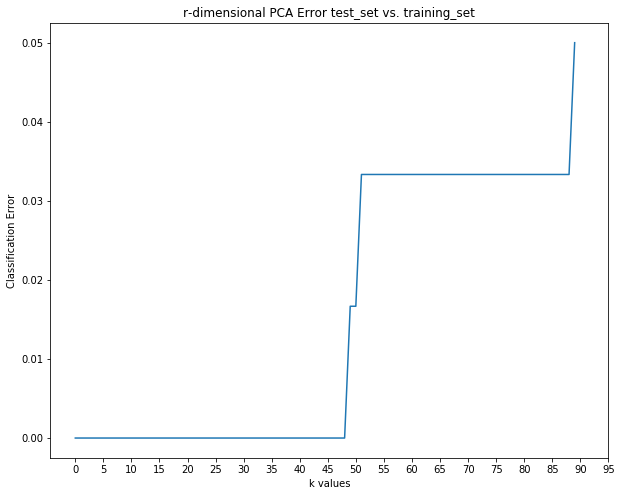

In [323]:
# Transpose the data matrix so each sample is a column
X = test_images.T

mean_vec = (np.sum(X, axis=1))/(X.shape[1])
mean_mat = np.tile(mean_vec.reshape(X.shape[0],1),[1,X.shape[1]])

#center the matrix
centered_X = X - mean_mat

#Singular Value Decomp centered matrix
U, s, Vh = np.linalg.svd(centered_X)

#Top 12 principal components of the centered data matrix
U2 = U[:,0:12]

#PCA features Test_set
X_tilde2 = U2.T@centered_X

errormat = []
#Loop through N -> 60 and k -> 300
for k in range (0, 91):
    rightcounter = 0
    wrongcounter = 0
    for n in range (0,60):
        nm, nm2, o = knn(X_tilde2.T[n],k)
        if o == test_labels[n]:
            rightcounter +=1
        else:
            wrongcounter +=1
    
    error = wrongcounter/(rightcounter+wrongcounter)
    errormat.append(error)
    #print(k, "Average Classification Error:", error)

xvals = list(range(91))
plt.figure(figsize=(10,8))
plt.plot(errormat[1:91])
plt.xticks(np.arange(0,96, step=5))
plt.title('r-dimensional PCA Error test_set vs. training_set')
plt.xlabel('k values')
plt.ylabel('Classification Error')
plt.show()

Strangely, my k-NN algorithm was classifying correctly for k values below ~50 as shown above. The error did not increase until K surpassed ~50 points. 

My reasoning is that with 300 training pts to compare norms, very 
low k values would not make much of a difference. As shown in the plot below, the test image pts are too close to the correct training points to be misclassified.

However, with higher K values to compare distances, the error can finally increase. 

This is due to the fact that all the Zero Digit pts are closely clumped together while the Ones Digit pts are spread out. So with more K pts to compare, outlier pts for the Ones Digit are more likely to be incorrectly classed under Zero.

But given that my algorithm may be flawed, judging from other PCA error plots for k-NN, the Classification Error plot forms a valley between k=1-9. Thus the lowest error would be in the middle at k=5.

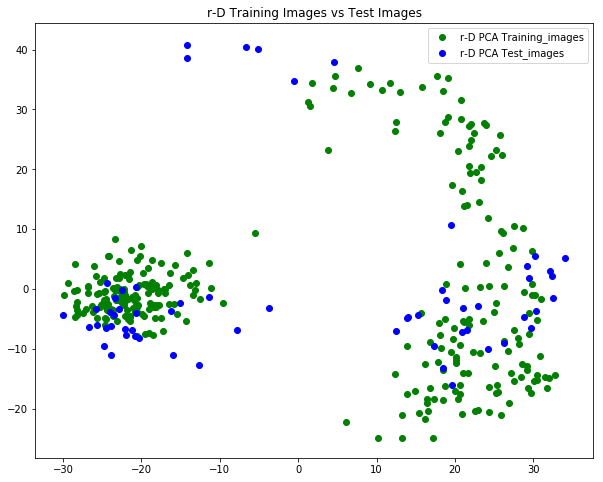

In [324]:
plt.figure(figsize=(10,8))
plt.scatter(X_tilde.T[:,0],X_tilde.T[:,1], color = 'green', label = 'r-D PCA Training_images')
plt.scatter(X_tilde2.T[:,0],X_tilde2.T[:,1], color = 'blue', label = 'r-D PCA Test_images')
plt.title('r-D Training Images vs Test Images')
plt.legend()
plt.show()